# Mini proyecto de planetas

## Datos del sistema solar

| Planeta | Distancia al Sol [UA] | Masa [MT] | Periodo [a] | Vel. orbital [UA/a]|
|---|:-:|:-:|:-:|:--|
| Mercurio | 0.39 | 0.06 | 0.24 | 1.625 | 
| Venus | 0.72 | 0.82 | 0.615 | 1.170 |
| Tierra | 1 | 1 | 1 | 2$\pi$ |
| Marte | 1.52 | 0.11 | 1.88 | 0.808 |
| Júpiter | 5.2 | 318 | 11.86 | 0.438 |
| Saturno | 9.54 | 95 | 29.46 | 3.088 |
| Urano | 19.19 | 14.6 | 84.01 | 4.377 |
| Neptuno | 30.06 | 17.2 | 164.79 | 5.482 |


Los datos que se muestran están unidades astronómicas.

In [72]:
from pylab import *
from scipy.integrate import *

$$
\frac{d^2}{d \tau ^2} \vec r_p =  - \frac{\hat r_p}{r_p ^2}  + \mu_T \frac{\vec r_T - \vec r_p }{|\vec r_T - \vec r_p|^{3/2}} \\
\frac{d^2}{d \tau ^2} \vec r_T =  - \frac{\hat r_T}{r_T ^2}  - \mu_p \frac{\vec r_T - \vec r_p }{|\vec r_T - \vec r_p|^{3/2}}
$$

In [73]:
def mov_p_T(t,x_v,mus=[0,0]):
    # x_v = [ xP , yP , xT , yT , dxP , dyP , dxT , dyT ]
    #         0    1    2    3     4     5     6     7
    # Planeta
    dxP = x_v[4]
    dyP = x_v[5]
    RP23 = (x_v[0]**2 + x_v[1]**2)**1.5
    ddxP = - x_v[0] / RP23
    ddyP = - x_v[1] / RP23
    # Tierra
    dxT = x_v[6]
    dyT = x_v[7]
    RT23 = (x_v[2]**2 + x_v[3]**2)**1.5
    ddxT = - x_v[2]/ RT23
    ddyT = - x_v[3]/ RT23
    return array([dxP,dyP,dxT,dyT,ddxP,ddyP,ddxT,ddyT])

In [92]:
intervalo_t = (0,2*pi)
CI = array([0.39,0,1,0,0,1.625,0,1])
sol = solve_ivp(mov_p_T,intervalo_t,CI,rtol=1e-8, atol=1e-8)

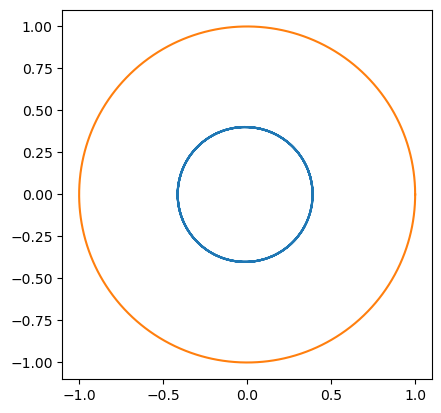

In [93]:
plot(sol.y[0],sol.y[1])
plot(sol.y[2],sol.y[3])
gca().set_aspect('equal')
show()

In [94]:
planeta = ['Mercurio','Venus','Marte','Jupiter','Saturno','Urano','Neptuno']
d_p = array([0.39,0.72,1.52,5.2,9.54,19.19,30.06])
v_p = array([1.625,1.17,0.808,0.438,3.088,4.377,5.482])